In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv


In [36]:
#Read csv file
df = pd.read_csv("/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv")

In [37]:
#head
df.head(10)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [38]:
#tail
df.tail()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [39]:
#describe
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [40]:
#shape
df.shape

(200, 5)

In [41]:
#size
df.size

1000

In [42]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [43]:
#null values
df.isnull()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [44]:
#total null values (columns)
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [45]:
#total null values
df.isnull().sum().sum()

0

In [46]:
#columns
df.columns

Index(['Unnamed: 0', 'TV Ad Budget ($)', 'Radio Ad Budget ($)',
       'Newspaper Ad Budget ($)', 'Sales ($)'],
      dtype='object')

In [47]:
#rename the columns
df.rename(columns = {'TV Ad Budget ($)':'TV','Radio Ad Budget ($)': 'Radio','Newspaper Ad Budget ($)':'Newspaper','Sales ($)': 'Sales'},inplace=True)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


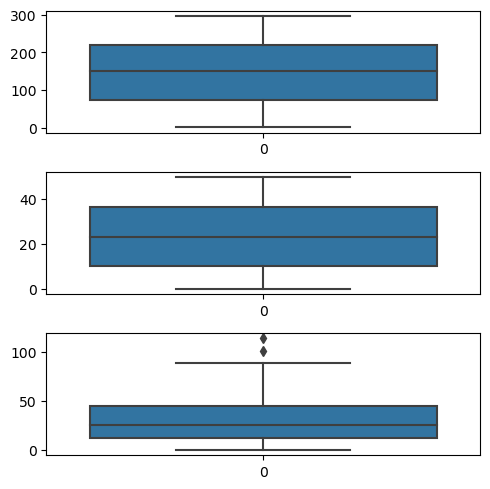

In [79]:
#outliers
import matplotlib.pyplot as plt
import seaborn as sns
fig,axis = plt.subplots(3,figsize=(5,5))
plt1 = sns.boxplot(df['TV'],ax = axis[0])
plt2 = sns.boxplot(df['Radio'],ax = axis[1])
plt3 = sns.boxplot(df['Newspaper'],ax = axis[2])
plt.tight_layout()

In [80]:
x1 = df["TV"]
x2 = df["Newspaper"]
x3 = df["Radio"]
y = df["Sales"]

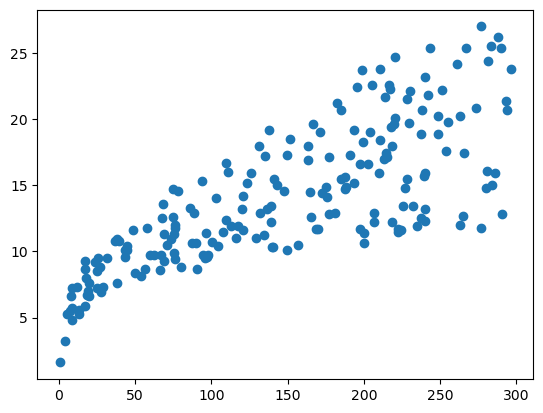

In [81]:
plt.scatter(x1,y)

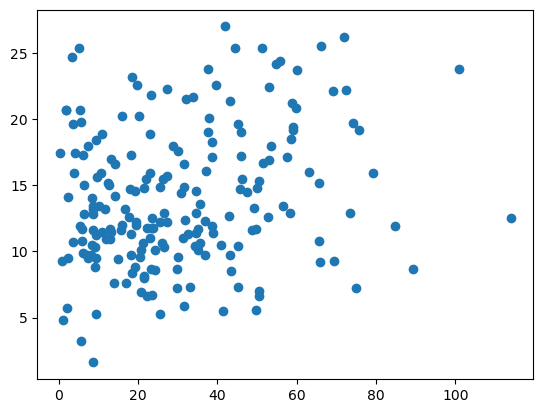

In [82]:
plt.scatter(x2,y)

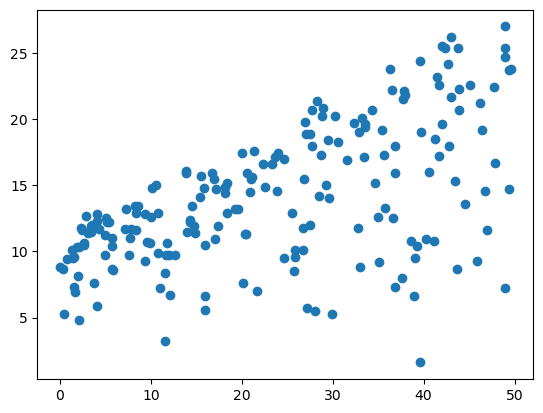

In [83]:
plt.scatter(x3,y)

In [84]:
#Linear Regression using OLS model
import statsmodels.api as sm
import numpy as np

y = df["Sales"]
x_vars = ["TV","Radio","Newspaper"]
x = df[x_vars]
x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 31 Aug 2023   Prob (F-statistic):           1.58e-96
Time:                        06:13:51   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [86]:
#input and ouput variable
x = df.drop('Sales', axis=1)
y = df['Sales']
print(x)
print(y)

     Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 4)
(40, 4)
(160,)
(40,)


In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size =0.8,test_size = 0.2,random_state=20)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
reg = LinearRegression()

In [91]:
model = reg.fit (x_train,y_train)
model

LinearRegression()

In [92]:
p_train = reg.predict(x_train)
p_test = reg.predict(x_test)

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

In [94]:
mean_squared_error(y_train , p_train)

2.6281355816359557

In [95]:
mean_absolute_error(y_train , p_train)

1.2097229695489105

In [96]:
r2_score(y_train , p_train)

0.8940674217997686